In [1]:
from file_hopping import Txt_hop
%matplotlib inline
from graph_hop import Graph_hop
import numpy as np
from hmm import HMM

# 5bs_hop-constposition

In [2]:
# directory name
dir_name = "P5bp_3bs_hop/5cp"
# molecule name is a number in these experimets
number = "5"

In [3]:
file = Txt_hop(dir_name, number, "hopcp", first_time_molecule=False)
dataFrame = file.bricolage()

In [4]:
dataFrame

,X_force,Z_force,lambda,Y_force,time(sec)
0,0.5594,-0.0468,24.18210,3.8085,26248.85156
1,0.6589,0.0702,23.95740,3.6452,26248.85352
2,-0.3044,-0.0845,24.44130,3.7731,26248.85352
3,-0.0426,-0.0091,23.88150,3.8842,26248.85547
4,-0.5487,0.0625,23.84730,3.8001,26248.85352
...,...,...,...,...,...
87578,-0.6673,-0.3861,65.03815,4.0559,26467.83594
87579,-0.0007,-0.2788,65.24970,4.1519,26467.83594
87580,0.1406,-0.2411,64.96500,4.1771,26467.83789
87581,-0.3620,-0.3194,64.60230,4.0408,26467.83984


In [5]:
forces_average = []
forces_average_std = []
w_U = []
w_N = []
sigma_w_U = []
sigma_w_N = []
native_time = []
unfolded_time = []
def mean(mu1, mu2):
    return (mu1+mu2)/2

def err_prop_mean(sigma1, sigma2):
    return np.sqrt(sigma1**2+sigma2**2)/2

# File 1

f media vale = 4.032816489454426, con deviazione standard = 0.3400922436297932


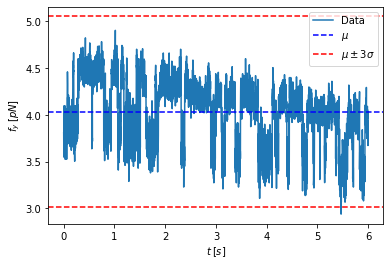

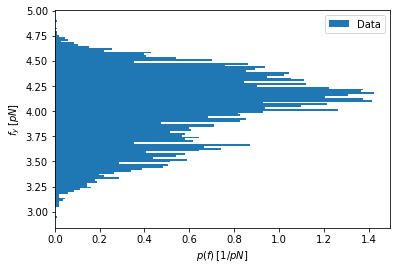

In [6]:
grafici = Graph_hop(dir_name, number, 1)
data_frame = grafici.do_graph(max_time=6)
# (2.4440e4+0.5+1.95e-3, 2.0442e4+1.-1.95e-3)

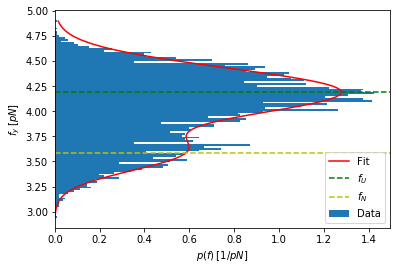

c_1 = 1.276248327246357, mu_1 = 4.191160146449875, sigma_1 = 0.23680455390438745
c_2 = 0.5363759600601437, mu_2 = 3.5860616074420433, sigma_2 = 0.184083020348081
sigma_c_1 = 0.02886955272870096, sigma_mu_1 = 0.010708857833870591, sigma_sigma_1 = 0.010959520429569766
sigma_c_2 = 0.036626441411768636, sigma_mu_2 = 0.021885727343817527, sigma_sigma_2 = 0.017944577112042264
w_U = 0.2474987275618388, sigma_w_U = 0.06355569088727948
w_N = 0.7575567460553095, sigma_w_N = 0.00800907185881766


In [7]:
prova = [2.2, 4., 0.3, 0.3, 3.5, 0.1]
fitting_par, fitting_err, prob, err_prob = grafici.fit(guess=prova)

In [8]:
forces_average.append(mean(fitting_par[1], fitting_par[4]))
forces_average_std.append(err_prop_mean(fitting_err[1], fitting_err[4]))
w_U.append(prob[0])
w_N.append(prob[1])
sigma_w_U.append(err_prob[0])
sigma_w_N.append(err_prob[1])

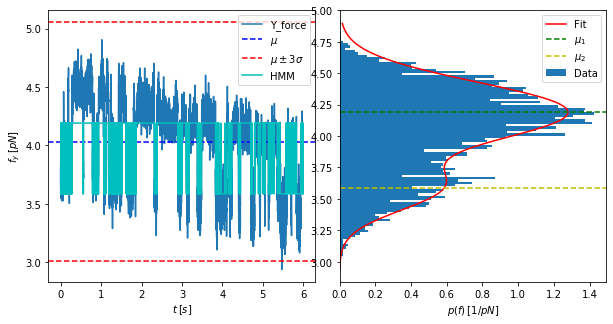

In [9]:
grafici.subplots(fitting_par)

In [10]:
native, unfolded = grafici.hmm_analysis(fitting_par)
native_time.append(native)
unfolded_time.append(unfolded)

La molecola si trova 4.019 sec nello stato nativo e 1.718 sec nello stato unfolded


In [11]:
native_hmm = []
unfolded_hmm = []

In [12]:
A = [[0.92, 0.08], [0.03, 0.97]] # taken by an article
PI = [0.5, 0.5]
X_fin = []
for i in range(0,6000,600):
    hidden = HMM(2, A, PI, data_frame['Y_force'].iloc[i:i+600].reset_index()['Y_force'], fitting_par)
    alpha, beta, X_1, A_1, PI_1 = hidden.iteration(MAX_ITERATION=200, show=False)
    X_fin.extend(X_1)
    print(f"LOADING {i/60+10}%")

states = []
for x in X_fin:
    if x == 0:
        states.append(fitting_par[1])
    else:
        states.append(fitting_par[4])
native = len([i for i in states if i == fitting_par[1]])*1e-3 # up force # [t_min:t_max]
unfolded = len([j for j in states if j == fitting_par[4]])*1e-3
native_hmm.append(native)
unfolded_hmm.append(unfolded)

LOADING 10.0%
LOADING 20.0%
LOADING 30.0%
LOADING 40.0%
LOADING 50.0%
LOADING 60.0%
LOADING 70.0%
LOADING 80.0%
LOADING 90.0%
LOADING 100.0%


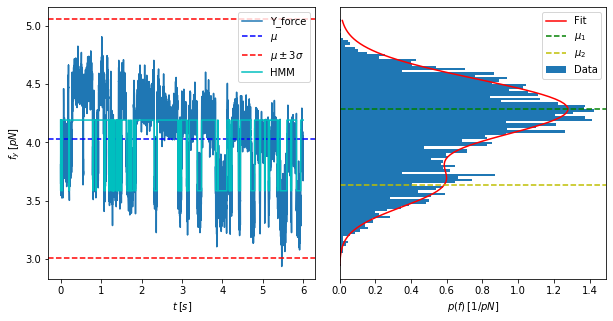

In [13]:
grafici.subplots(fitting_par, n_points_fig=6000, X=X_fin)

In [14]:
data_frame

,X_force,Z_force,lambda,Y_force,time(sec)
0,0.5594,-0.0468,24.18210,3.8085,0.00000
1,0.6589,0.0702,23.95740,3.6452,0.00196
2,-0.3044,-0.0845,24.44130,3.7731,0.00196
3,-0.0426,-0.0091,23.88150,3.8842,0.00391
4,-0.5487,0.0625,23.84730,3.8001,0.00196
...,...,...,...,...,...
5732,-0.3044,-0.2208,23.94080,3.8388,5.99414
5733,-0.2939,-0.2556,24.03380,3.8691,5.99610
5734,-0.6813,-0.3281,23.77670,3.6721,5.99610
5735,-0.2573,-0.2411,23.78175,3.8135,5.99805


# File 2

f media vale = 4.289130662263166, con deviazione standard = 0.29471671421240714


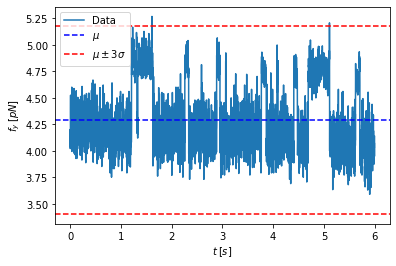

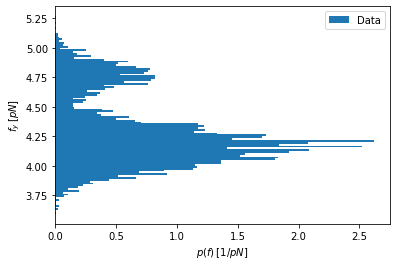

In [15]:
grafici = Graph_hop(dir_name, number, 2)
data_frame = grafici.do_graph(max_time=6)
# (2.0440e4+0.5+1.95e-3, 2.0442e4+1.-1.95e-3)

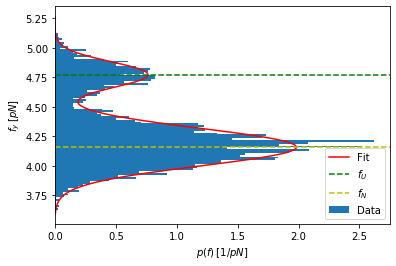

c_1 = 0.7636812903808099, mu_1 = 4.772278928156326, sigma_1 = 0.10949464153727005
c_2 = 1.9835840451278022, mu_2 = 4.157860520808824, sigma_2 = 0.15818398777571105
sigma_c_1 = 0.054002241923032296, sigma_mu_1 = 0.00914722764301842, sigma_sigma_1 = 0.00909012959654421
sigma_c_2 = 0.043982135948887016, sigma_mu_2 = 0.004095167041973484, sigma_sigma_2 = 0.004127937225421995
w_U = 0.7865078477790366, sigma_w_U = 0.005392481393594474
w_N = 0.20960177260436175, sigma_w_N = 0.06449063812269908


In [16]:
prova = [0.4, 4.7, 0.1, 1.2, 4.1, 0.1]
fitting_par, fitting_err, prob, err_prob = grafici.fit(guess=prova)
# (c1, mu1, sigma1, c2, mu2, sigma2)


In [17]:
forces_average.append(mean(fitting_par[1], fitting_par[4]))
forces_average_std.append(err_prop_mean(fitting_err[1], fitting_err[4]))
w_U.append(prob[0])
w_N.append(prob[1])
sigma_w_U.append(err_prob[0])
sigma_w_N.append(err_prob[1])

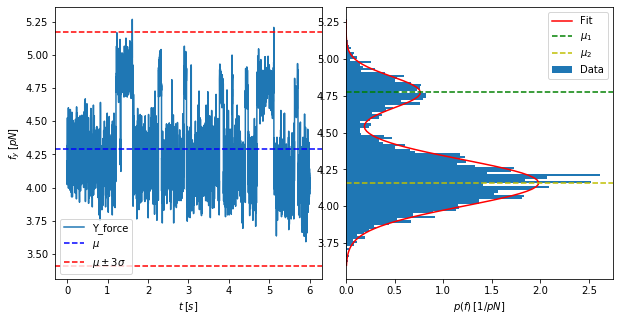

In [18]:
grafici.subplots(fitting_par, False)

In [19]:
native, unfolded = grafici.hmm_analysis(fitting_par)
native_time.append(native)
unfolded_time.append(unfolded)

La molecola si trova 1.2730000000000001 sec nello stato nativo e 4.48 sec nello stato unfolded


In [20]:
A = [[0.92, 0.08], [0.03, 0.97]] # taken by an article
PI = [0.5, 0.5]
X_fin = []
for i in range(0,6000,600):
    hidden = HMM(2, A, PI, data_frame['Y_force'].iloc[i:i+600].reset_index()['Y_force'], fitting_par)
    alpha, beta, X_1, A_1, PI_1 = hidden.iteration(MAX_ITERATION=200, show=False)
    X_fin.extend(X_1)
    print(f"LOADING {i/60+10}%")

states = []
for x in X_fin:
    if x == 0:
        states.append(fitting_par[1])
    else:
        states.append(fitting_par[4])
native = len([i for i in states if i == fitting_par[1]])*1e-3 # up force # [t_min:t_max]
unfolded = len([j for j in states if j == fitting_par[4]])*1e-3
native_hmm.append(native)
unfolded_hmm.append(unfolded)

LOADING 10.0%
LOADING 20.0%
LOADING 30.0%
LOADING 40.0%
LOADING 50.0%
LOADING 60.0%
LOADING 70.0%
LOADING 80.0%
LOADING 90.0%
LOADING 100.0%


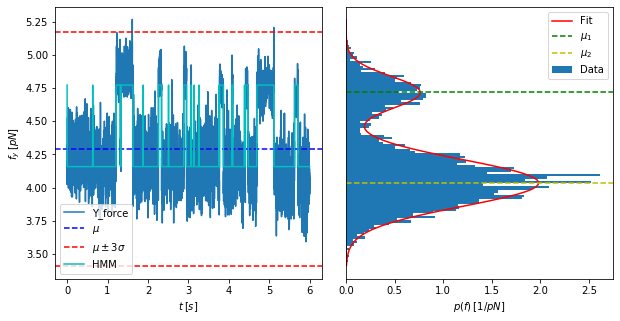

In [21]:
grafici.subplots(fitting_par, n_points_fig=6000, X=X_fin)

In [22]:
data_frame

,X_force,Z_force,lambda,Y_force,time(sec)
0,0.0568,-0.2063,55.62405,4.1418,0.00000
1,0.0359,-0.2614,55.16120,4.2024,0.00000
2,0.0097,-0.2585,55.32305,4.0223,0.00196
3,-0.0531,-0.1077,55.42720,4.1771,0.00196
4,0.3448,-0.0961,55.06095,4.0559,0.00391
...,...,...,...,...,...
5748,0.0464,-0.2846,55.45885,4.0307,5.99415
5749,0.4547,-0.1657,55.38215,4.0761,5.99415
5750,1.1038,-0.1193,55.55885,3.9499,5.99610
5751,0.4495,-0.1831,55.12310,3.9549,5.99610


# File 3

f media vale = 4.154580448383732, con deviazione standard = 0.30047865552298075


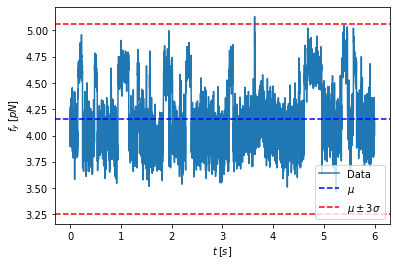

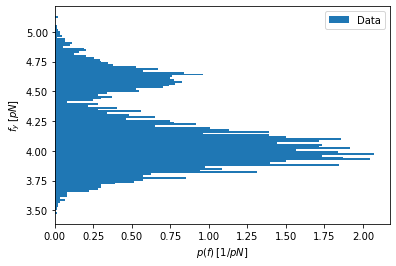

In [23]:
grafici = Graph_hop(dir_name, number, 3)
data_frame = grafici.do_graph(max_time=6)
# (2.0440e4+0.5+1.95e-3, 2.0442e4+1.-1.95e-3)

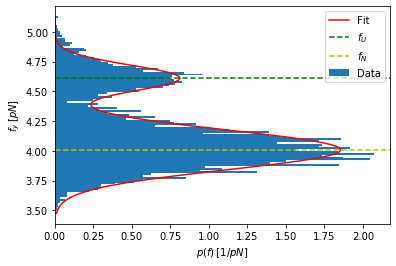

c_1 = 0.8104771253339571, mu_1 = 4.611994486471357, sigma_1 = 0.10846704974575509
c_2 = 1.8569322840022242, mu_2 = 4.008468310619667, sigma_2 = 0.1660708474272093
sigma_c_1 = 0.047246169190199555, sigma_mu_1 = 0.007514437242211807, sigma_sigma_1 = 0.007528858578320162
sigma_c_2 = 0.037397057069241305, sigma_mu_2 = 0.003912777858800736, sigma_sigma_2 = 0.003987568719271625
w_U = 0.7729998377431574, sigma_w_U = 0.005166537857115244
w_N = 0.22035784871670175, sigma_w_N = 0.052442840128003224


In [24]:
prova = [0.7, 4.6, 0.1, 1.8, 4.0, 0.2]
fitting_par, fitting_err, prob, err_prob = grafici.fit(guess=prova)
# (c1, mu1, sigma1, c2, mu2, sigma2)


In [25]:
forces_average.append(mean(fitting_par[1], fitting_par[4]))
forces_average_std.append(err_prop_mean(fitting_err[1], fitting_err[4]))
w_U.append(prob[0])
w_N.append(prob[1])
sigma_w_U.append(err_prob[0])
sigma_w_N.append(err_prob[1])

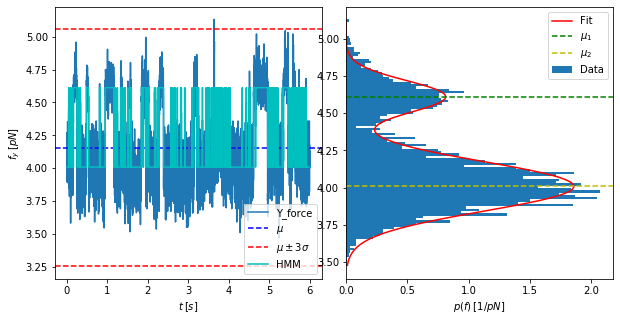

In [26]:
grafici.subplots(fitting_par)

In [27]:
native, unfolded = grafici.hmm_analysis(fitting_par)
native_time.append(native)
unfolded_time.append(unfolded)

La molecola si trova 1.367 sec nello stato nativo e 4.3870000000000005 sec nello stato unfolded


In [28]:
A = [[0.92, 0.08], [0.03, 0.97]] # taken by an article
PI = [0.5, 0.5]
X_fin = []
for i in range(0,6000,600):
    hidden = HMM(2, A, PI, data_frame['Y_force'].iloc[i:i+600].reset_index()['Y_force'], fitting_par)
    alpha, beta, X_1, A_1, PI_1 = hidden.iteration(MAX_ITERATION=200, show=False)
    X_fin.extend(X_1)
    print(f"LOADING {i/60+10}%")

states = []
for x in X_fin:
    if x == 0:
        states.append(fitting_par[1])
    else:
        states.append(fitting_par[4])
native = len([i for i in states if i == fitting_par[1]])*1e-3 # up force # [t_min:t_max]
unfolded = len([j for j in states if j == fitting_par[4]])*1e-3
native_hmm.append(native)
unfolded_hmm.append(unfolded)

LOADING 10.0%
LOADING 20.0%
LOADING 30.0%
LOADING 40.0%
LOADING 50.0%
LOADING 60.0%
LOADING 70.0%
LOADING 80.0%
LOADING 90.0%
LOADING 100.0%


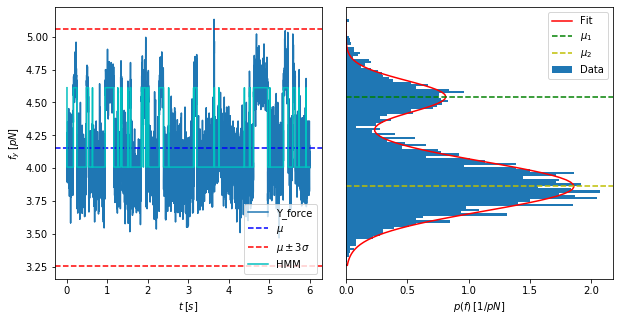

In [29]:
grafici.subplots(fitting_par, n_points_fig=6000, X=X_fin)

In [30]:
data_frame

,X_force,Z_force,lambda,Y_force,time(sec)
0,0.4128,0.1475,70.22640,4.1064,0.00000
1,0.8264,0.1591,70.44005,3.9751,0.00000
2,0.2191,0.1707,70.78085,3.8943,0.00195
3,0.4425,0.2210,70.39545,4.2310,0.00000
4,0.5611,0.3795,70.13420,4.1771,0.00391
...,...,...,...,...,...
5749,0.8892,0.0895,67.79130,3.9549,5.99414
5750,-0.5557,-0.0845,68.52735,4.1771,5.99609
5751,0.1144,0.0489,68.15000,4.1771,5.99609
5752,0.4442,0.1301,68.05075,4.0004,5.99805


# File 4

f media vale = 3.5339449075688925, con deviazione standard = 0.2740161398895872


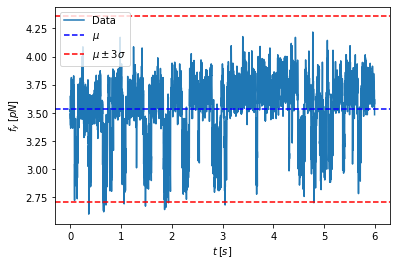

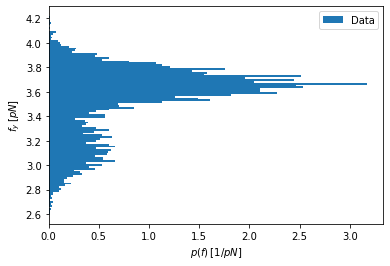

In [31]:
grafici = Graph_hop(dir_name, number, 4)
data_frame = grafici.do_graph(max_time=6)
# (2.0440e4+0.5+1.95e-3, 2.0442e4+1.-1.95e-3)

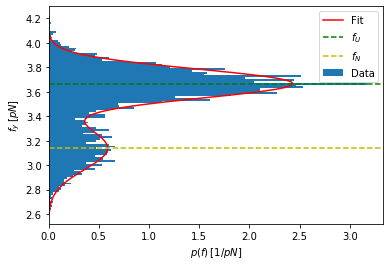

c_1 = 2.4272391500123502, mu_1 = 3.667117089940962, sigma_1 = 0.11956437886257218
c_2 = 0.5870255409991401, mu_2 = 3.139676823835599, sigma_2 = 0.17660793150670456
sigma_c_1 = 0.05027405397337771, sigma_mu_1 = 0.0032852594907148832, sigma_sigma_1 = 0.003436058212977116
sigma_c_2 = 0.041285043435599696, sigma_mu_2 = 0.015932403631186566, sigma_sigma_2 = 0.017091801927352976
w_U = 0.2598705918889865, sigma_w_U = 0.062101155544264236
w_N = 0.7274519537766749, sigma_w_N = 0.006550984218345416


In [32]:
prova = [2.5, 3.6, 0.1, 0.5, 3.2, 0.1]
fitting_par, fitting_err, prob, err_prob = grafici.fit(guess=prova)
# (c1, mu1, sigma1, c2, mu2, sigma2)


In [33]:
forces_average.append(mean(fitting_par[1], fitting_par[4]))
forces_average_std.append(err_prop_mean(fitting_err[1], fitting_err[4]))
w_U.append(prob[0])
w_N.append(prob[1])
sigma_w_U.append(err_prob[0])
sigma_w_N.append(err_prob[1])

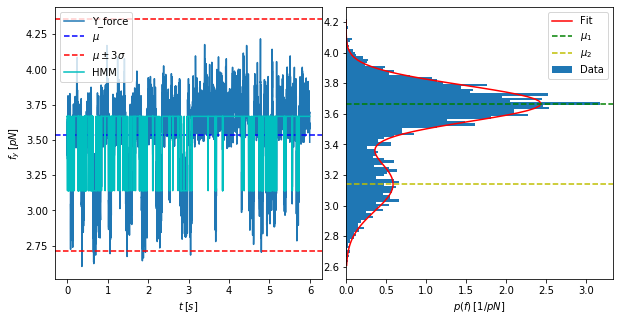

In [34]:
grafici.subplots(fitting_par)

In [35]:
native, unfolded = grafici.hmm_analysis(fitting_par)
native_time.append(native)
unfolded_time.append(unfolded)

La molecola si trova 4.18 sec nello stato nativo e 1.554 sec nello stato unfolded


In [36]:
A = [[0.92, 0.08], [0.03, 0.97]] # taken by an article
PI = [0.5, 0.5]
X_fin = []
for i in range(0,6000,600):
    hidden = HMM(2, A, PI, data_frame['Y_force'].iloc[i:i+600].reset_index()['Y_force'], fitting_par)
    alpha, beta, X_1, A_1, PI_1 = hidden.iteration(MAX_ITERATION=200, show=False)
    X_fin.extend(X_1)
    print(f"LOADING {i/60+10}%")

states = []
for x in X_fin:
    if x == 0:
        states.append(fitting_par[1])
    else:
        states.append(fitting_par[4])
native = len([i for i in states if i == fitting_par[1]])*1e-3 # up force # [t_min:t_max]
unfolded = len([j for j in states if j == fitting_par[4]])*1e-3
native_hmm.append(native)
unfolded_hmm.append(unfolded)

LOADING 10.0%
LOADING 20.0%
LOADING 30.0%
LOADING 40.0%
LOADING 50.0%
LOADING 60.0%
LOADING 70.0%
LOADING 80.0%
LOADING 90.0%
LOADING 100.0%


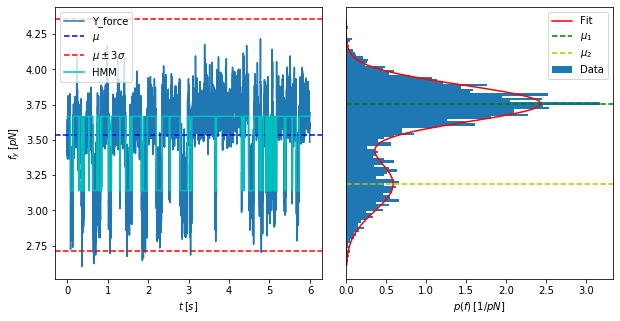

In [37]:
grafici.subplots(fitting_par, n_points_fig=6000, X=X_fin)

In [38]:
data_frame

,X_force,Z_force,lambda,Y_force,time(sec)
0,0.0795,0.1282,34.43440,3.6452,0.00000
1,0.6519,0.0354,34.31250,3.6048,0.00000
2,0.6379,-0.0381,34.32445,3.5442,0.00196
3,0.6693,-0.0207,34.62430,3.5105,0.00196
4,0.4913,-0.1193,34.42005,3.5307,0.00391
...,...,...,...,...,...
5729,1.2557,-0.1135,34.50635,3.6519,5.99024
5730,0.8787,-0.1019,34.41705,3.5762,5.99219
5731,0.6536,-0.0352,34.74830,3.6115,5.99219
5732,0.3605,-0.0265,34.40205,3.6216,5.99219


# File 5

f media vale = 4.3309124304589774, con deviazione standard = 0.2638260004072937


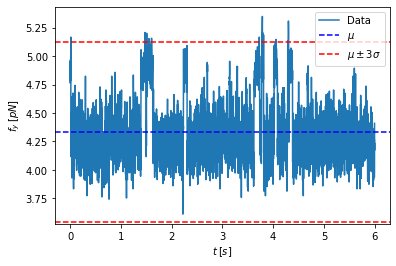

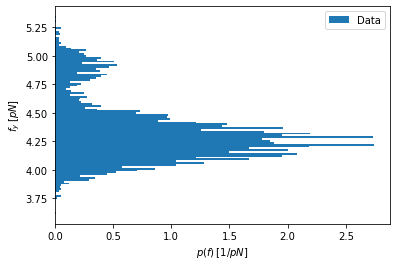

In [39]:
grafici = Graph_hop(dir_name, number, 5)
data_frame = grafici.do_graph(max_time=6)
# (2.0440e4+0.5+1.95e-3, 2.0442e4+1.-1.95e-3)

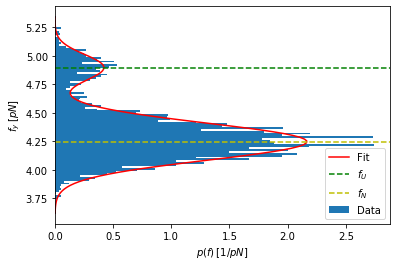

c_1 = 0.4203783835126825, mu_1 = 4.898116131777069, sigma_1 = 0.11518744167503257
c_2 = 2.1662594884571114, mu_2 = 4.246294502853114, sigma_2 = 0.16217225735746207
sigma_c_1 = 0.059239287641886344, sigma_mu_1 = 0.01912537916622598, sigma_sigma_1 = 0.018956902947137394
sigma_c_2 = 0.0489531319625631, sigma_mu_2 = 0.004273842417301002, sigma_sigma_2 = 0.004291587143354077
w_U = 0.8805965387063277, sigma_w_U = 0.003178457921925752
w_N = 0.12137673270325472, sigma_w_N = 0.14370012877608027


In [40]:
prova = [0.5, 4.8, 0.1, 2., 4.2, 0.2]
fitting_par, fitting_err, prob, err_prob = grafici.fit(guess=prova)
# (c1, mu1, sigma1, c2, mu2, sigma2)


In [41]:
forces_average.append(mean(fitting_par[1], fitting_par[4]))
forces_average_std.append(err_prop_mean(fitting_err[1], fitting_err[4]))
w_U.append(prob[0])
w_N.append(prob[1])
sigma_w_U.append(err_prob[0])
sigma_w_N.append(err_prob[1])

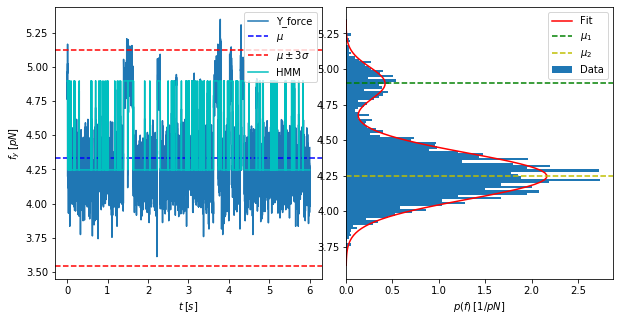

In [42]:
grafici.subplots(fitting_par)

In [43]:
native, unfolded = grafici.hmm_analysis(fitting_par)
native_time.append(native)
unfolded_time.append(unfolded)

La molecola si trova 0.772 sec nello stato nativo e 4.98 sec nello stato unfolded


In [44]:
A = [[0.92, 0.08], [0.03, 0.97]] # taken by an article
PI = [0.5, 0.5]
X_fin = []
for i in range(0,6000,600):
    hidden = HMM(2, A, PI, data_frame['Y_force'].iloc[i:i+600].reset_index()['Y_force'], fitting_par)
    alpha, beta, X_1, A_1, PI_1 = hidden.iteration(MAX_ITERATION=200, show=False)
    X_fin.extend(X_1)
    print(f"LOADING {i/60+10}%")

states = []
for x in X_fin:
    if x == 0:
        states.append(fitting_par[1])
    else:
        states.append(fitting_par[4])
native = len([i for i in states if i == fitting_par[1]])*1e-3 # up force # [t_min:t_max]
unfolded = len([j for j in states if j == fitting_par[4]])*1e-3
native_hmm.append(native)
unfolded_hmm.append(unfolded)

LOADING 10.0%
LOADING 20.0%
LOADING 30.0%
LOADING 40.0%
LOADING 50.0%
LOADING 60.0%
LOADING 70.0%
LOADING 80.0%
LOADING 90.0%
LOADING 100.0%


c:\Users\ricta\Documents\TesiTriennale\hmm.py:152: RuntimeWarning: invalid value encountered in double_scalars
  a_0_0 = num_a_0_0/den_a_0
c:\Users\ricta\Documents\TesiTriennale\hmm.py:155: RuntimeWarning: invalid value encountered in double_scalars
  a_0_1 = num_a_0_1/den_a_0


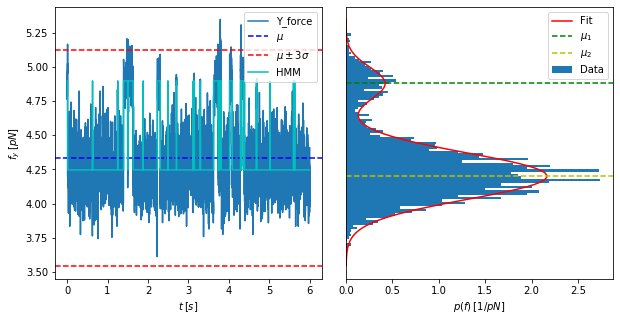

In [45]:
grafici.subplots(fitting_par, n_points_fig=6000, X=X_fin)

In [46]:
data_frame

,X_force,Z_force,lambda,Y_force,time(sec)
0,0.3866,-0.2208,64.01745,4.9599,0.00000
1,0.4006,-0.1695,63.56275,4.9245,0.00000
2,0.2470,-0.1038,64.27315,4.8909,0.00000
3,0.4390,-0.0787,63.91100,4.7629,0.00195
4,0.8264,-0.1077,64.23520,4.9043,0.00391
...,...,...,...,...,...
5747,0.3029,-0.0497,63.94740,3.9347,5.99414
5748,0.3814,-0.0149,63.58545,4.0357,5.99609
5749,0.2296,0.0982,63.32250,4.2377,5.99609
5750,-0.1316,0.0402,63.41920,4.1721,5.99805


# File 6

f media vale = 4.019746155184413, con deviazione standard = 0.30625895108562623


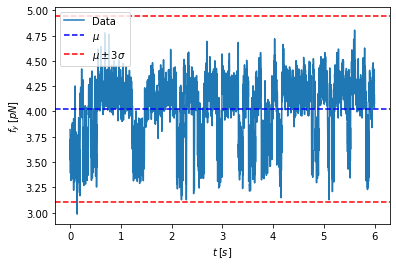

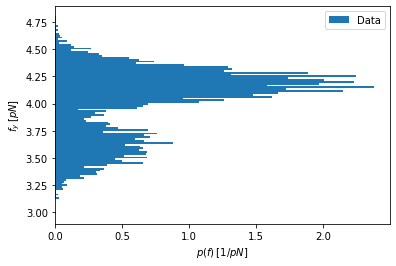

In [47]:
grafici = Graph_hop(dir_name, number, 6)
data_frame = grafici.do_graph(max_time=6)
# (2.0440e4+0.5+1.95e-3, 2.0442e4+1.-1.95e-3)

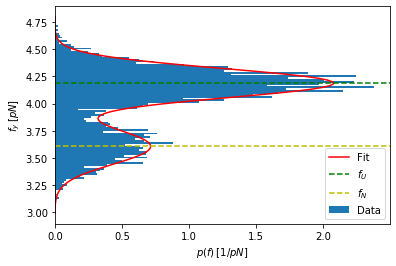

c_1 = 2.076996407352196, mu_1 = 4.187759119411301, sigma_1 = 0.13433152014829275
c_2 = 0.7137399399499599, mu_2 = 3.605916715970541, sigma_2 = 0.16410846079535
sigma_c_1 = 0.045940889818711375, sigma_mu_1 = 0.0036353913975343054, sigma_sigma_1 = 0.0038276786381827464
sigma_c_2 = 0.04093622659580219, sigma_mu_2 = 0.01144248664996476, sigma_sigma_2 = 0.01197421655113028
w_U = 0.29360328224797705, sigma_w_U = 0.04753891904779823
w_N = 0.6993645408087991, sigma_w_N = 0.007724762584697435


In [48]:
prova = [1.7, 4.2, 0.1, 1., 3.6, 0.2]
fitting_par, fitting_err, prob, err_prob = grafici.fit(guess=prova)
# (c1, mu1, sigma1, c2, mu2, sigma2)


In [49]:
forces_average.append(mean(fitting_par[1], fitting_par[4]))
forces_average_std.append(err_prop_mean(fitting_err[1], fitting_err[4]))
w_U.append(prob[0])
w_N.append(prob[1])
sigma_w_U.append(err_prob[0])
sigma_w_N.append(err_prob[1])

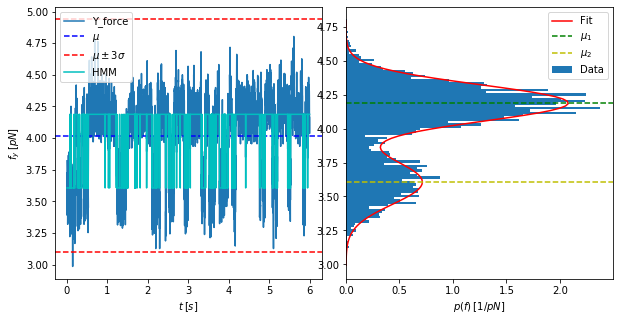

In [50]:
grafici.subplots(fitting_par)

In [51]:
native, unfolded = grafici.hmm_analysis(fitting_par)
native_time.append(native)
unfolded_time.append(unfolded)

La molecola si trova 4.011 sec nello stato nativo e 1.737 sec nello stato unfolded


In [52]:
A = [[0.92, 0.08], [0.03, 0.97]] # taken by an article
PI = [0.5, 0.5]
X_fin = []
for i in range(0,6000,600):
    hidden = HMM(2, A, PI, data_frame['Y_force'].iloc[i:i+600].reset_index()['Y_force'], fitting_par)
    alpha, beta, X_1, A_1, PI_1 = hidden.iteration(MAX_ITERATION=200, show=False)
    X_fin.extend(X_1)
    print(f"LOADING {i/60+10}%")

states = []
for x in X_fin:
    if x == 0:
        states.append(fitting_par[1])
    else:
        states.append(fitting_par[4])
native = len([i for i in states if i == fitting_par[1]])*1e-3 # up force # [t_min:t_max]
unfolded = len([j for j in states if j == fitting_par[4]])*1e-3
native_hmm.append(native)
unfolded_hmm.append(unfolded)

LOADING 10.0%
LOADING 20.0%
LOADING 30.0%
LOADING 40.0%
LOADING 50.0%
LOADING 60.0%
LOADING 70.0%
LOADING 80.0%
LOADING 90.0%
LOADING 100.0%


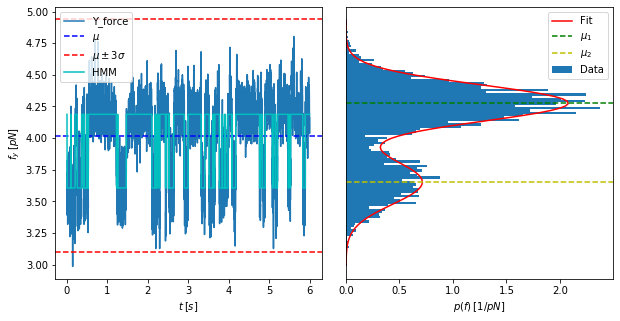

In [53]:
grafici.subplots(fitting_par, n_points_fig=6000, X=X_fin)

In [54]:
data_frame

,X_force,Z_force,lambda,Y_force,time(sec)
0,1.0218,0.2403,42.23420,3.8203,0.00000
1,1.3080,0.1417,42.18325,3.7630,0.00195
2,1.3918,0.0663,42.37205,3.5307,0.00391
3,0.9101,0.0431,42.35340,3.5206,0.00391
4,0.2453,0.0025,42.09780,3.6267,0.00586
...,...,...,...,...,...
5743,0.3168,-0.0381,42.63695,4.3320,5.99219
5744,0.5070,-0.2382,42.54720,4.0357,5.99609
5745,0.4704,-0.3087,42.50340,4.0761,5.99414
5746,0.3238,-0.2971,42.02450,4.0761,5.99805


# File 7

f media vale = 3.971761180773251, con deviazione standard = 0.32646034960945897


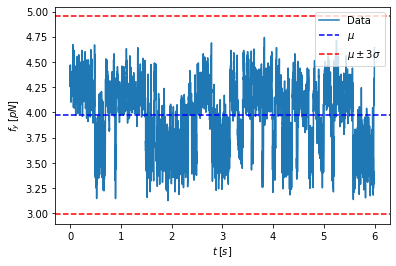

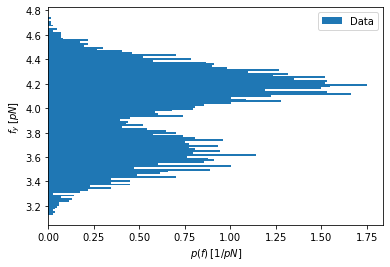

In [55]:
grafici = Graph_hop(dir_name, number, 7)
data_frame = grafici.do_graph(max_time=6)
# (2.0440e4+0.5+1.95e-3, 2.0442e4+1.-1.95e-3)

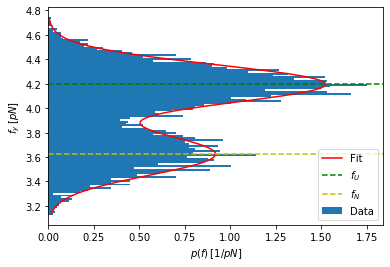

c_1 = 1.520634540236525, mu_1 = 4.195926291296846, sigma_1 = 0.15856923702308523
c_2 = 0.916055311195544, mu_2 = 3.6224547342298514, sigma_2 = 0.17083670744437715
sigma_c_1 = 0.031459383903682726, sigma_mu_1 = 0.00444980427165303, sigma_sigma_1 = 0.004829982929890139
sigma_c_2 = 0.029592055864783293, sigma_mu_2 = 0.007571253511608791, sigma_sigma_2 = 0.00783128244439321
w_U = 0.3922769806301508, sigma_w_U = 0.02394023105467793
w_N = 0.6044128955036419, sigma_w_N = 0.010077444417237761


In [56]:
prova = [1.4, 4.2, 0.2, 1.2, 3.6, 0.2]
fitting_par, fitting_err, prob, err_prob = grafici.fit(guess=prova)
# (c1, mu1, sigma1, c2, mu2, sigma2)


In [57]:
forces_average.append(mean(fitting_par[1], fitting_par[4]))
forces_average_std.append(err_prop_mean(fitting_err[1], fitting_err[4]))
w_U.append(prob[0])
w_N.append(prob[1])
sigma_w_U.append(err_prob[0])
sigma_w_N.append(err_prob[1])

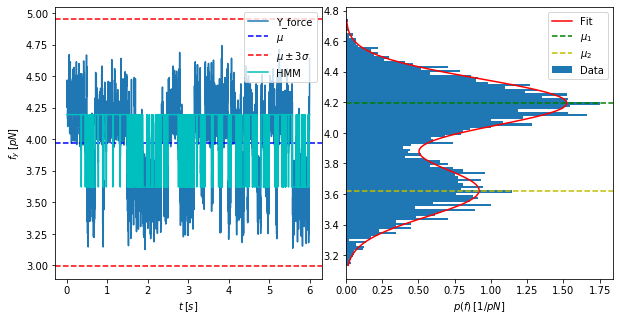

In [58]:
grafici.subplots(fitting_par)

In [59]:
native, unfolded = grafici.hmm_analysis(fitting_par)
native_time.append(native)
unfolded_time.append(unfolded)

La molecola si trova 3.4490000000000003 sec nello stato nativo e 2.293 sec nello stato unfolded


In [60]:
A = [[0.92, 0.08], [0.03, 0.97]] # taken by an article
PI = [0.5, 0.5]
X_fin = []
for i in range(0,6000,600):
    hidden = HMM(2, A, PI, data_frame['Y_force'].iloc[i:i+600].reset_index()['Y_force'], fitting_par)
    alpha, beta, X_1, A_1, PI_1 = hidden.iteration(MAX_ITERATION=200, show=False)
    X_fin.extend(X_1)
    print(f"LOADING {i/60+10}%")

states = []
for x in X_fin:
    if x == 0:
        states.append(fitting_par[1])
    else:
        states.append(fitting_par[4])
native = len([i for i in states if i == fitting_par[1]])*1e-3 # up force # [t_min:t_max]
unfolded = len([j for j in states if j == fitting_par[4]])*1e-3
native_hmm.append(native)
unfolded_hmm.append(unfolded)

LOADING 10.0%
LOADING 20.0%
LOADING 30.0%
LOADING 40.0%
LOADING 50.0%
LOADING 60.0%
LOADING 70.0%
LOADING 80.0%
LOADING 90.0%
LOADING 100.0%


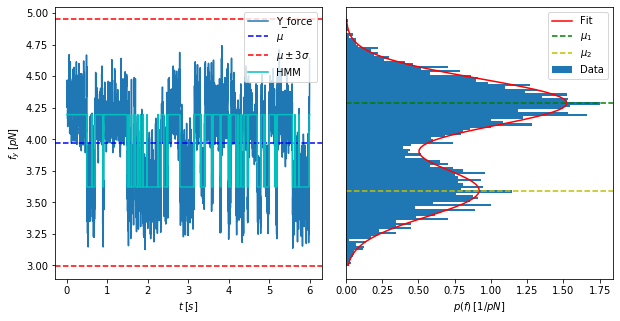

In [61]:
grafici.subplots(fitting_par, n_points_fig=6000, X=X_fin)

In [62]:
data_frame

,X_force,Z_force,lambda,Y_force,time(sec)
0,-0.1683,0.0460,65.94520,4.3791,0.00000
1,0.1563,0.1127,65.86355,4.3539,0.00000
2,0.9730,0.1707,65.60255,4.4599,0.00000
3,0.6589,0.0547,65.54525,4.4397,0.00196
4,0.4844,0.1050,65.90015,4.3185,0.00391
...,...,...,...,...,...
5737,0.3134,-0.0265,65.38540,4.2276,5.99219
5738,0.3657,0.0547,65.31515,4.3236,5.99414
5739,0.4495,0.2055,65.23970,4.3993,5.99414
5740,-0.5242,0.0431,65.60930,4.4195,5.99610


In [63]:
forces_average

[3.8886108769459593,
 4.465069724482575,
 4.310231398545511,
 3.4033969568882805,
 4.572205317315092,
 3.896837917690921,
 3.909190512763349]

## Average of the average -> $\bar{f} = \frac{\mu_1 + \mu_2}{2}$

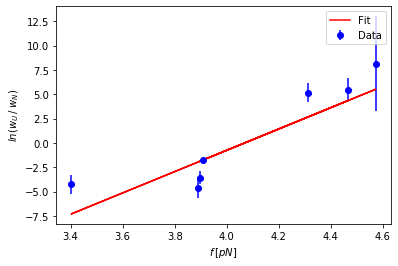

La forza di coesistenza vale f_c = 4.0686591985332115, con sigma = 0.6436187719049368
La differenza di lunghezza tra lo stato foldend e unfolded e' x_NU = 10.95435252844097, con sigma = 1.247290466759753
La differenza di energia libera DeltaG_NU = 44.56952717881689, con sigma = 4.894377023751196


In [64]:
x_NU, f_c, DeltaG_NU = grafici.deltaG(w_U, w_N, forces_average, sigma_w_U, sigma_w_N) 

In [65]:
G0 = grafici.G0(f_c)

DeltaG0 = 31.626426890314757, con sigma = 3.332759037924527


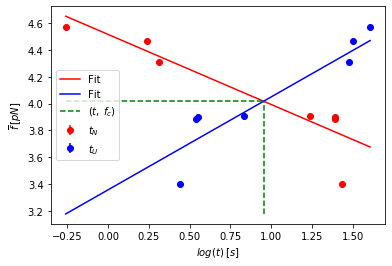

Stimiamo i parametri del fit lineare: m1 = -0.5237304526509542, con incertezza = 0.003922811912475986, 
 q1 = 4.516907155813398, con incertezza = 0.003709266013882764
Stimiamo i parametri del fit lineare: m2 = 0.694355250705108, con incertezza = 0.005143893834083983, 
 q2 = 3.356188985334985, con incertezza = 0.006054057562492442
La forza di coesistenza qui vale: fc = 4.017842557033562, con incertezza = 0.004497617047857896
Il tempo medi di residenza vale: tc = 2.5932282631543164, con incertezza = 0.020017604368388883
Stimiamo un nuovo DeltaG_NU = 44.01286377351834, con incertezza = 5.011658897824048


((-0.5237304526509542, 0.003922811912475986),
 (4.516907155813398, 0.003709266013882764),
 (0.694355250705108, 0.005143893834083983),
 (3.356188985334985, 0.006054057562492442),
 (4.017842557033562, 0.004497617047857896),
 (2.5932282631543164, 0.020017604368388883),
 (44.01286377351834, 5.011658897824048))

In [66]:
grafici.residence_time(native_time, unfolded_time, forces_average, forces_average_std)

In [68]:
native_hmm, unfolded_hmm

([4.304, 1.2, 1.2550000000000001, 4.224, 0.676, 3.991, 3.388],
 [1.433, 4.553, 4.499, 1.51, 5.0760000000000005, 1.7570000000000001, 2.354])

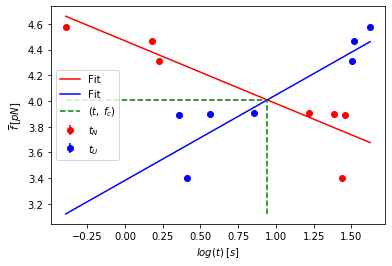

Stimiamo i parametri del fit lineare: m1 = -0.487351911117987, con incertezza = 0.003659504164898027, 
 q1 = 4.468171650992679, con incertezza = 0.0034269415616092437
Stimiamo i parametri del fit lineare: m2 = 0.664267550594376, con incertezza = 0.004954371160902624, 
 q2 = 3.3819186938683092, con incertezza = 0.0059111386746231636
La forza di coesistenza qui vale: fc = 4.008482081466847, con incertezza = 0.004247373682491252
Il tempo medi di residenza vale: tc = 2.568287907199961, con incertezza = 0.020001720622631513
Stimiamo un nuovo DeltaG_NU = 43.91032582432667, con incertezza = 4.99995797119765


((-0.487351911117987, 0.003659504164898027),
 (4.468171650992679, 0.0034269415616092437),
 (0.664267550594376, 0.004954371160902624),
 (3.3819186938683092, 0.0059111386746231636),
 (4.008482081466847, 0.004247373682491252),
 (2.568287907199961, 0.020001720622631513),
 (43.91032582432667, 4.99995797119765))

In [67]:
grafici.residence_time(native_hmm, unfolded_hmm, forces_average, forces_average_std)

# Eliminiamo il punto con maggiore incertezza

In [70]:
def remove_element(arr, pos):
    arr.pop(pos)
    return arr

In [71]:
# proviamo ad eliminare il pimo punto, quello più in alto
forces_average = remove_element(forces_average, 0)
forces_average_std = remove_element(forces_average_std, 0)
w_U = remove_element(w_U, 0)
w_N = remove_element(w_N, 0)
sigma_w_U = remove_element(sigma_w_U, 0)
sigma_w_N = remove_element(sigma_w_N, 0)
native_time = remove_element(native_time, 0)
unfolded_time = remove_element(unfolded_time, 0)
native_hmm = remove_element(native_hmm, 0)
unfolded_hmm = remove_element(unfolded_hmm, 0)

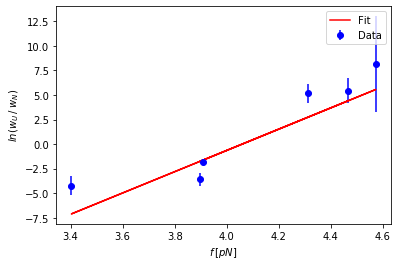

La forza di coesistenza vale f_c = 4.059318008668152, con sigma = 0.6505976118207403
La differenza di lunghezza tra lo stato foldend e unfolded e' x_NU = 10.83389444126033, con sigma = 1.2481895395904339
La differenza di energia libera DeltaG_NU = 43.978222809417844, con sigma = 4.899896932355755


In [72]:
x_NU, f_c, DeltaG_NU = grafici.deltaG(w_U, w_N, forces_average, sigma_w_U, sigma_w_N) 

In [55]:
f_c

(3.9541625745445934, 0.697394947760243)

In [56]:
G0 = grafici.G0(f_c)

DeltaG0 = 30.18016873462468, con sigma = 3.5611963850506103


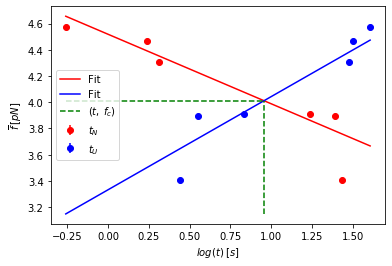

Stimiamo i parametri del fit lineare: m1 = -0.5307848330612469, con incertezza = 0.004008692398020835, 
 q1 = 4.51876950332259, con incertezza = 0.00371565964295551
Stimiamo i parametri del fit lineare: m2 = 0.7113632298108757, con incertezza = 0.005296770396685278, 
 q2 = 3.331957627488442, con incertezza = 0.0063159654927718665
La forza di coesistenza qui vale: fc = 4.011630489690698, con incertezza = 0.004615177557556406
Il tempo medi di residenza vale: tc = 2.5998434065463223, con incertezza = 0.02029034050183762
Stimiamo un nuovo DeltaG_NU = 43.46158126265051, con incertezza = 5.007524847938981


In [73]:
m1, q_1, m2, q_2, f_c, t_c, DeltaGNU = grafici.residence_time(native_time, unfolded_time, forces_average, forces_average_std)

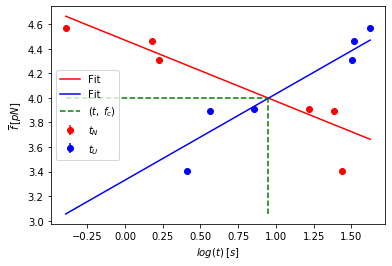

Stimiamo i parametri del fit lineare: m1 = -0.4969417232758359, con incertezza = 0.0037568374673633467, 
 q1 = 4.470405142549272, con incertezza = 0.0034326498012774783
Stimiamo i parametri del fit lineare: m2 = 0.7021161396694191, con incertezza = 0.005209752374666949, 
 q2 = 3.3300536863266217, con incertezza = 0.006309977312669214
La forza di coesistenza qui vale: fc = 3.9977939072553954, con incertezza = 0.0044127846353886405
Il tempo medi di residenza vale: tc = 2.58839904398896, con incertezza = 0.020355166018462368
Stimiamo un nuovo DeltaG_NU = 43.31167718911865, con incertezza = 4.990233546113781


((-0.4969417232758359, 0.0037568374673633467),
 (4.470405142549272, 0.0034326498012774783),
 (0.7021161396694191, 0.005209752374666949),
 (3.3300536863266217, 0.006309977312669214),
 (3.9977939072553954, 0.0044127846353886405),
 (2.58839904398896, 0.020355166018462368),
 (43.31167718911865, 4.990233546113781))

In [74]:
grafici.residence_time(native_hmm, unfolded_hmm, forces_average, forces_average_std)

In [58]:
f_c, t_c

((3.959143125461576, 0.008855708274841213),
 (4.948954335781927, 0.06749866690694804))

### Tolgo un altro punto

In [59]:
forces_average, native_time

([4.396948370446181,
  4.315634622749954,
  3.424699655237795,
  4.56465118711277,
  3.9148054509749075,
  3.914745550031145],
 [2.512, 2.2680000000000002, 7.998, 1.6440000000000001, 6.025, 5.273])

In [60]:
# proviamo ad eliminare il pimo punto, quello più in alto
forces_average = remove_element(forces_average, 4)
forces_average_std = remove_element(forces_average_std, 4)
w_U = remove_element(w_U, 4)
w_N = remove_element(w_N, 4)
sigma_w_U = remove_element(sigma_w_U, 4)
sigma_w_N = remove_element(sigma_w_N, 4)
native_time = remove_element(native_time, 4)
unfolded_time = remove_element(unfolded_time, 4)

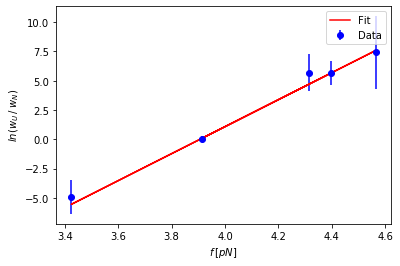

La forza di coesistenza vale f_c = 3.906720636726431, con sigma = 0.7321441779122242
La differenza di lunghezza tra lo stato foldend e unfolded e' x_NU = 11.534429289424827, con sigma = 1.5222092944510888
La differenza di energia libera DeltaG_NU = 45.06179293785775, con sigma = 5.995895781297792


In [61]:
x_NU, f_c, DeltaG_NU = grafici.deltaG(w_U, w_N, forces_average, sigma_w_U, sigma_w_N) 

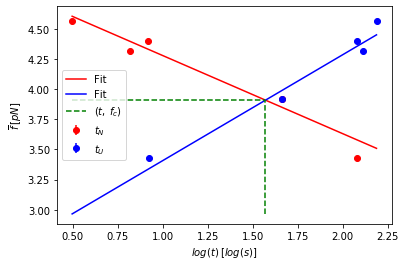

Stimiamo i parametri del fit lineare: m1 = -0.6474961452707274, con incertezza = 0.005819647262164595, 
 q1 = 4.925591448976898, con incertezza = 0.007183366472801748
Stimiamo i parametri del fit lineare: m2 = 0.8778585309498489, con incertezza = 0.007850812142951765, 
 q2 = 2.5288942102416554, con incertezza = 0.015134872218819796
La forza di coesistenza qui vale: fc = 3.9082200483088623, con incertezza = 0.010652642882498342
Il tempo medi di residenza vale: tc = 4.8126088445230355, con incertezza = 0.07170033334279224
Stimiamo un nuovo DeltaG_NU = 45.07908779473106, con incertezza = 5.950397635864738


((-0.6474961452707274, 0.005819647262164595),
 (4.925591448976898, 0.007183366472801748),
 (0.8778585309498489, 0.007850812142951765),
 (2.5288942102416554, 0.015134872218819796),
 (3.9082200483088623, 0.010652642882498342),
 (4.8126088445230355, 0.07170033334279224),
 (45.07908779473106, 5.950397635864738))

In [62]:
grafici.residence_time(native_time, unfolded_time, forces_average, forces_average_std)

In [63]:
grafici.write_on_txt()